# Fourier Transforms


In [2]:
# numpy is the main Python array library
import numpy as np # "as np" allows us to use the abbreviation np for convenience

# we use matplotlib for plotting graphs
import matplotlib.pyplot as plt 
%matplotlib inline

### First, let's generate the time-series data

(e.g. voltage vs. time from an oscilloscope)
Our example signal will be the sum of two sine waves, with different amplitudes and whose frequencies differ by a factor of two.

In [ ]:
Fs    = 1e11    # [Hz] sampling rate
Ts    = 1/Fs   # [s]  sampling interval (time interval between samples)
tmin  = 0      # [s]  start time
tmax  = 5e-3   # [s]  end time
tt = np.arange(tmin, tmax, Ts)  # [s] time samples

ff    = 3e3          # [Hz]  Signal frequency
omega = ff*(2*np.pi) # [rad/s] Signal angular frequency
yy = 3.0*np.sin(omega*tt) + 7.0*np.sin(2*omega*tt)
plt.plot(tt, yy, 'k-')
plt.grid()

Doing the Fourier Transform
We then compute the fourier transform, as well as the corresponding frequencies. We expect two peaks, one for each input frequency, and the amplitudes of the peaks should correspond to the amplitudes of the original input sine waves.

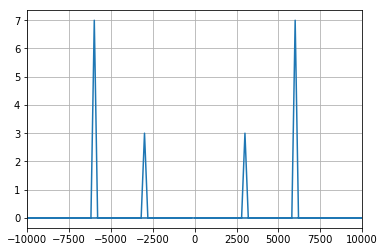

In [4]:
def fourierCompare(Ts,tt,y):
    sp   = np.fft.fft(y)#........................compute the FTT
    sp   = np.abs(sp)/(0.5*len(tt))#.............compute the magnitude of the (complex) FTT (the abs value) and normalize
    freq = np.fft.fftfreq(len(tt),Ts) #..........compute the corresponding frequencies [Hz]
    plt.plot(freq, np.abs(sp))#..................plot the frequency Vs. amplitude graph
    plt.xlim(xmin=-10000, xmax=10000) 
    plt.grid()
fourierCompare(Ts, tt,yy)

Limiting the frequencies to positive values allows our specta to be one-sided instead of two-sided.

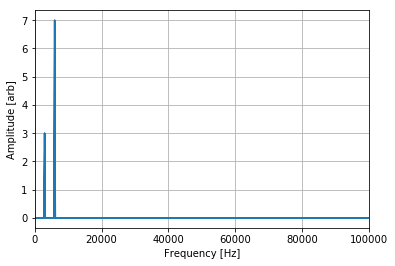

In [18]:
def fourier(Ts,tt,y):
    sp   = np.fft.fft(y)
    sp   = np.abs(sp)/(0.5*len(tt))
    freq = np.fft.fftfreq(len(tt),Ts)
    plt.plot(abs(freq), np.abs(sp))#......only look at the "positive frequencies" and gives us one-sided power spectral density(PSD)
    plt.xlim(xmin=0, xmax=100000)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [arb]')
    plt.grid()
fourier(Ts, tt,yy)

By having more data points, we can have a peak with narrower width.

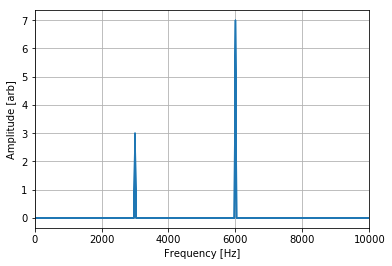

In [24]:
t = np.arange(tmin, 6*tmax, Ts)  # we multiplied tmax to get more data points with the same step size.
y = 3.0*np.sin(omega*t) + 7.0*np.sin(2*omega*t)
fourier(Ts, t,y)

And as we gather more and more data points, our fourier transform becomes a delta function.

#### The Nyquist Critical Frequency

$$
f_c=\frac{1}{2Ts}
$$

Since critical sampling of a sine wave is two sampling per cycle, if a function is bandwidth limited to frequencies smaller in magnitude than the $f_c$, then the function is completely determined by its samples.
Otherwise, the PSD outside the domain[-$f_c$, $f_c$] is moved to  this domain. This is called aliasing.

Our    $f_c$=0.5*Ts  =5e5

Now let's add a function of frequency f>$f_c$ to our y function.

f 942477.7960769379
freq 30000
sp 30000
(6000.0, 6.9999999999999822)
(400000.0, 4.9999999999999929)
(400000.0, 4.9999999999999929)
(6000.0, 6.9999999999999805)


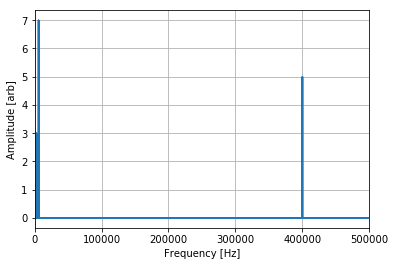

In [42]:

t = np.arange(tmin, 6.*tmax, Ts)  # we multiplied tmax to get more data points with the same step size.
f=6e5
newOmega=f*(2*np.pi)
y1 = 3.0*np.sin(omega*t) + 7.0*np.sin(2*omega*t)+5.0*   #np.sin(newOmega*t)
print ('f', (100./np.pi*omega)/2*np.pi)
# our new frequency is 100./np.pi*omega=6e5.
def fourier(Ts,tt,y):
    sp   = np.fft.fft(y)
    sp   = np.abs(sp)/(0.5*len(tt))
    freq = np.fft.fftfreq(len(tt),Ts)
    freqabs=np.abs(freq)
    spabs=np.abs(sp)
    print ('freq', len(freqabs))
    print ('sp', len(spabs))
    
    for i in range(len(spabs)):
        if spabs[i]>4:
              print ((freqabs[i], spabs[i]))
    plt.plot(np.abs(freq), np.abs(sp))#......only look at the "positive frequencies" and gives us one-sided power spectral density(PSD)
    plt.xlim(xmin=0, xmax=5e5)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [arb]')
    plt.grid()
fourier(Ts, t,y1)